### experimenting with HMF predictions

looking at the HMF provided in Tinker et al. 2008 (p. 12), specifically the parameterization of $f(\sigma)$ using $z$:

$A(z) = A_0(1+z)^{-0.14}$

$a(z) = a_0(1+z)^{-0.06}$

$b(z) = b_0(1+z)^{-\alpha}$

$\log \alpha(\Delta) = -( \frac{0.75}{\log(\Delta / 75)})^{1.2}$

for $\Delta = 200$, which should (?) correspond to our defined overdensity, the parameters are given as

$A_0 = 0.186$

$a_0 = 1.47$

$b_0 = 2.57$

$c_0 = 1.19$

and we expect that $f(\sigma) = A[(\sigma/b)^{-a} + 1] \cdot e^{-c/\sigma^2}$ 

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler

#......formatting
%matplotlib inline
%config InlineBackend.figure_format='retina'
%config InlineBackend.rc = {'figure.facecolor': 'w'}
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = 'cm'

#....... fancy color things
n = 3 # no. of colors
new_colors = [plt.get_cmap('magma')(1. * i/n) for i in range(n)]

plt.rc('axes', prop_cycle=(cycler('color', new_colors)))

In [49]:
A_0 = 0.186
a_0 = 1.47
b_0 = 2.57
c_0 = 1.19

def alpha(delta):
    return np.exp( -((0.75/np.log(delta/75)) ** 1.2) )

def A(z):
    return A_0 * ((1+z) ** -0.14)

def a(z):
    return a_0 * ((1+z) ** -0.06)

def b(z, delta):
    return b_0 * ((1+z) ** (-1 * alpha(delta)) )


def f(sigma, z, delta):
    return A(z) * (((sigma/b(z, delta))**-a(z)) + 1) * np.exp(-c_0/(sigma**2))

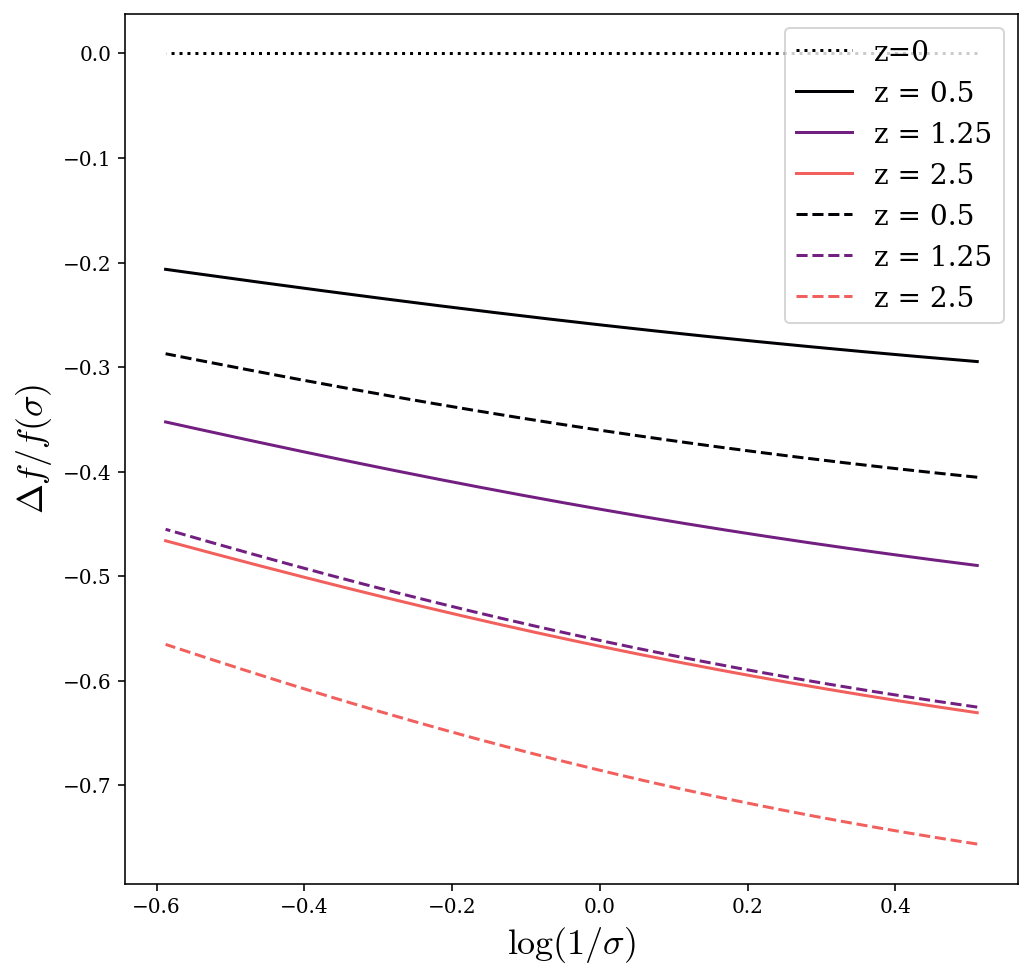

In [52]:
sigma = np.linspace(0.6, 1.5, 500)
# redshifts = np.linspace(1, 10, 10)
redshifts = [0.5, 1.25, 2.5]
delta = 200
baseline = f(sigma, 0, delta)

plt.figure(figsize=(8,8))
plt.tight_layout()
plt.plot(np.log(1/sigma), (baseline - baseline)/baseline, 'k:',label ='z=0')

for z in redshifts:
    plt.plot(np.log(1/sigma), (f(sigma, z, delta) - baseline)/baseline, label=f'z = {z}', linestyle='-')
    
delta = 1600
baseline = f(sigma, 0, delta)
for z in redshifts:
    plt.plot(np.log(1/sigma), (f(sigma, z, delta) - baseline)/baseline, label=f'z = {z}', linestyle='--')
    
plt.xlabel(r'$\log(1/\sigma)$', fontsize=18)
plt.ylabel(r'$\Delta f/ f(\sigma)$', fontsize=18)
plt.legend(fontsize=14)

#### come back to fix this, seems to be putting out estimates that are different from what the paper predicts/claims.

Text(0, 0.5, '$\\Delta f/ f(\\sigma)$')

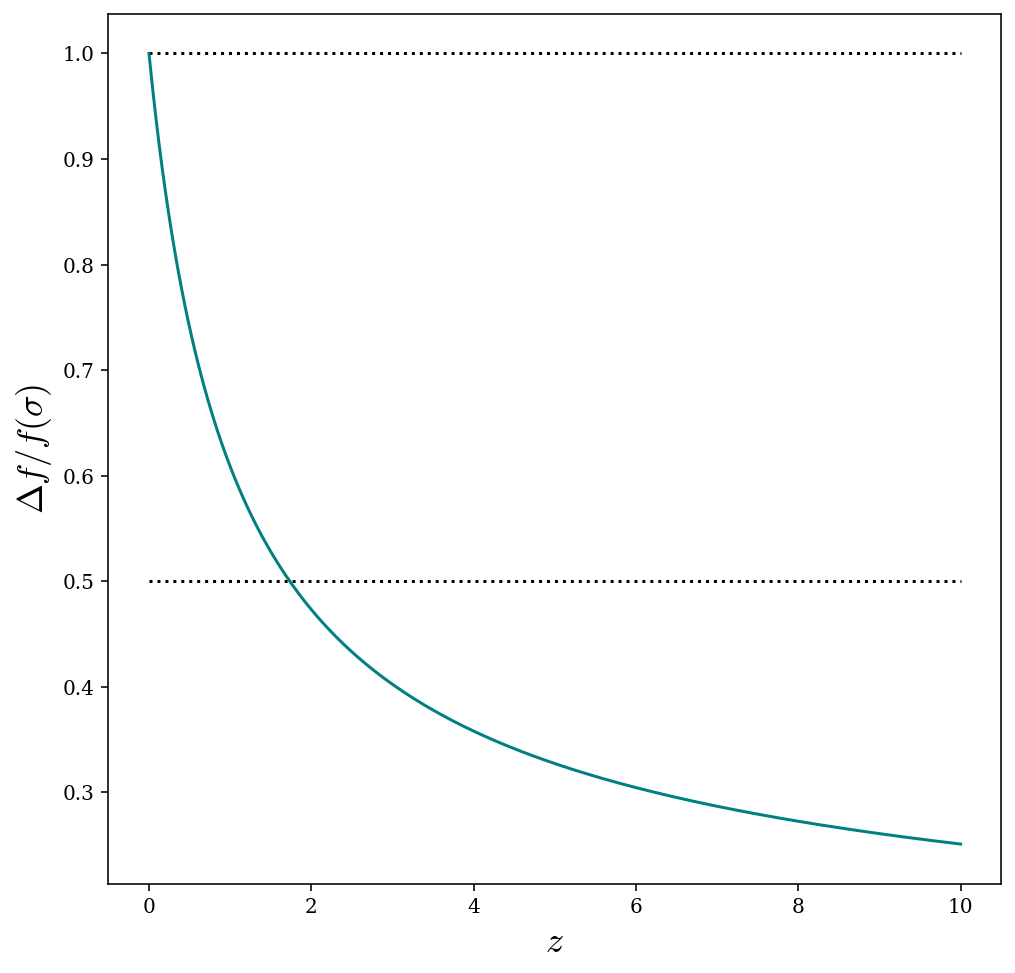

In [66]:
sigma = 1
z = np.linspace(0, 10, 500)
delta = 200

plt.figure(figsize=(8,8))
plt.tight_layout()

baseline = f(sigma, 0, delta)
plt.plot(z, z* 0 + 1, 'k:')
plt.plot(z, z* 0 + 0.5, 'k:')
plt.plot(z, f(sigma, z, delta) / baseline, c='teal')
    
plt.xlabel(r'$z$', fontsize=18)
plt.ylabel(r'$\Delta f/ f(\sigma)$', fontsize=18)

# plt.legend(fontsize=14)